<h1 style="color:Tomato; text-align:center;">CapStone UseCase Project<br><br>
    
<p style="text-align:center;">Customer Churn Prediction<p>
<p style="text-align:right;">By- Mohd Asif Ansari (52111482)<p>
</h1>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Importing Necessary Python Libraries to make the project

import numpy as np # linear algebra
import pandas as pd # data processing
import plotly.express as px #for visualization
import matplotlib.pyplot as plt #for visualization 
import seaborn as sns

<h1 style="color:Tomato; text-align:center;">Step 1- Data Preparation
</h1>

In [2]:
# Step1 - Data Prepration
# Source code to Simulate Customer Data
# Code provided in PDF
# does not contains any null values as it is auto generated

np.random.seed(42)
customer_data={}
customer_data['CustomerId']=np.random.randint(10000,20000,size=10000)
customer_data['CreditScore']=np.random.randint(500,800,size=10000)
customer_data['Age']=np.random.randint(20,60,size=10000)
customer_data['Tenure']=np.random.randint(1,10,size=10000)
customer_data['Balance']=np.random.randint(1000,10000,size=10000)
customer_data['NumOfProducts']=np.random.randint(1,5,size=10000)
customer_data['HasCrCard']=np.random.choice(['Yes','No'], size=10000)
customer_data['IsActiveMember']=np.random.choice(['Yes','No'], size=10000)
customer_data['EstimatedSalary']=np.random.randint(30000,100000,size=10000)
customer_data['Churn']=np.random.choice(['Yes','No'],size=10000, p=[0.1,0.9])

In [3]:
# Printing and checking the CustomerId Dictionary
print(customer_data)

{'CustomerId': array([17270, 10860, 15390, ..., 11389, 14276, 11249]), 'CreditScore': array([594, 796, 580, ..., 558, 684, 543]), 'Age': array([31, 35, 56, ..., 57, 44, 51]), 'Tenure': array([3, 3, 3, ..., 9, 2, 2]), 'Balance': array([3414, 6656, 9962, ..., 6342, 3163, 4076]), 'NumOfProducts': array([1, 2, 3, ..., 1, 2, 3]), 'HasCrCard': array(['Yes', 'Yes', 'Yes', ..., 'No', 'Yes', 'Yes'], dtype='<U3'), 'IsActiveMember': array(['No', 'Yes', 'No', ..., 'Yes', 'No', 'Yes'], dtype='<U3'), 'EstimatedSalary': array([93705, 61819, 75376, ..., 50665, 43352, 45269]), 'Churn': array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U3')}


In [4]:
# Making a DataFrame from the data provided
customer_data_df=pd.DataFrame(customer_data)

In [5]:
# Describing the dataframe to see the basic analysis of data
customer_data_df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14964.05660,648.951900,39.594800,5.067600,5491.554700,2.486000,65164.904100
std,2879.64797,86.880684,11.494643,2.572138,2613.567682,1.117197,20162.807821
min,10001.00000,500.000000,20.000000,1.000000,1000.000000,1.000000,30002.000000
25%,12499.25000,572.000000,30.000000,3.000000,3189.750000,1.000000,47688.500000
50%,14935.50000,649.000000,40.000000,5.000000,5502.000000,2.000000,65224.500000
75%,17401.00000,725.000000,50.000000,7.000000,7765.250000,3.000000,82826.750000
max,19998.00000,799.000000,59.000000,9.000000,9998.000000,4.000000,99997.000000


In [6]:
# printing the data of the dataframe
customer_data_df.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,17270,594,31,3,3414,1,Yes,No,93705,No
1,10860,796,35,3,6656,2,Yes,Yes,61819,No
2,15390,580,56,3,9962,3,Yes,No,75376,No
3,15191,674,35,2,6147,1,No,No,60504,No
4,15734,721,36,6,5444,1,Yes,Yes,72288,No


# Checking wheather the Customer_data contains any missing values or not

In [7]:
print("Missing values:", customer_data_df.isnull().sum().values.sum())

Missing values: 0


<h1 style="color:Tomato; text-align:center;">Step 2 - Feature Engineering
</h1>

In [8]:
# Step 2 Feature Engineering
# Create new rows- CustomerLifetimeValue and CustomerEngagementScore

customer_data_df['IsActiveMember']=customer_data_df['IsActiveMember'].replace({'No': 0, 'Yes': 1}) #replace Yes/No values in IsActiveMember column to 1/0

customer_data_df['CustomerLifetimeValue']=customer_data_df['Tenure']*customer_data_df['Balance']

customer_data_df['CustomerEngagementScore']=(customer_data_df['NumOfProducts']+ customer_data_df['IsActiveMember'])/2

customer_data_df.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,CustomerLifetimeValue,CustomerEngagementScore
0,17270,594,31,3,3414,1,Yes,0,93705,No,10242,0.5
1,10860,796,35,3,6656,2,Yes,1,61819,No,19968,1.5
2,15390,580,56,3,9962,3,Yes,0,75376,No,29886,1.5
3,15191,674,35,2,6147,1,No,0,60504,No,12294,0.5
4,15734,721,36,6,5444,1,Yes,1,72288,No,32664,1.0


In [9]:
# Seeing an Overview of the Customer DataFrame

print('Overview of the dataset')
print('Number of rows: ', customer_data_df.shape[0])
print("Number of features:", customer_data_df.shape[1])
print("Data Features:")
print(customer_data_df.columns.tolist())
print("Missing values:", customer_data_df.isnull().sum().values.sum())
print("Unique values:")
print(customer_data_df.nunique())


Overview of the dataset
Number of rows:  10000
Number of features: 12
Data Features:
['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Churn', 'CustomerLifetimeValue', 'CustomerEngagementScore']
Missing values: 0
Unique values:
CustomerId                 6280
CreditScore                 300
Age                          40
Tenure                        9
Balance                    6069
NumOfProducts                 4
HasCrCard                     2
IsActiveMember                2
EstimatedSalary            9303
Churn                         2
CustomerLifetimeValue      8609
CustomerEngagementScore       5
dtype: int64


<h1 style="color:Tomato; text-align:center;">Step 3 - Exploratory Data Analysis (EDA)
</h1>

In [10]:
# Making Visuals to See the Customer Churn rate

churn_count = customer_data_df["Churn"].value_counts().to_frame()
churn_count = churn_count.reset_index()
churn_count = churn_count.rename(columns={'index':'count'})

fig = px.pie(churn_count, values='count', names='Churn', color_discrete_sequence=["green", "red"], title='Distribution of Churn')
fig.show()

print(churn_count)

  Churn  count
0    No   9023
1   Yes    977


In [11]:
customer_data_df.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,CustomerLifetimeValue,CustomerEngagementScore
0,17270,594,31,3,3414,1,Yes,0,93705,No,10242,0.5
1,10860,796,35,3,6656,2,Yes,1,61819,No,19968,1.5
2,15390,580,56,3,9962,3,Yes,0,75376,No,29886,1.5
3,15191,674,35,2,6147,1,No,0,60504,No,12294,0.5
4,15734,721,36,6,5444,1,Yes,1,72288,No,32664,1.0


In [12]:
# Making Visuals to See the Customer Churn rate

churn_count = customer_data_df["Churn"] #.value_counts().to_frame()
#churn_count = churn_count.reset_index()
#churn_count = churn_count.rename(columns={'index':'count'})

#fig = px.pie(churn_count, values='count', names='Churn', color_discrete_sequence=["green", "red"], title='Distribution of Churn')
#fig.show()

print(churn_count)

0       No
1       No
2       No
3       No
4       No
        ..
9995    No
9996    No
9997    No
9998    No
9999    No
Name: Churn, Length: 10000, dtype: object


In [13]:
# Defining a function for making Histogram which takes a feature name as input and returns the visual for that feature 
def hist(feature):
    feature_df = customer_data_df.groupby([feature, 'Churn']).size().reset_index()
    feature_df = feature_df.rename(columns={0: 'Count'})
    fig = px.histogram(feature_df, x=feature, y='Count', color='Churn', title=f'Churn rate frequency to {feature} distribution', color_discrete_sequence=["green", "red"])
    fig.show()
    

# Histogram Visuals for the various Important Features


In [14]:
hist('CustomerEngagementScore')

In [15]:
hist('Tenure')

In [16]:
hist('CustomerLifetimeValue')

In [17]:
hist('CreditScore')

In [18]:
hist('EstimatedSalary')

In [19]:
hist('NumOfProducts')

<h1 style="color:Tomato; text-align:center;">Step 4 - Data Standardization
</h1>

In [20]:
# step 2 Data standardization 
# changing the YES/NO values in table to Binary digits

customer_data_df=customer_data_df.replace({'No': 0, 'Yes': 1})
customer_data_df.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,CustomerLifetimeValue,CustomerEngagementScore
0,17270,594,31,3,3414,1,1,0,93705,0,10242,0.5
1,10860,796,35,3,6656,2,1,1,61819,0,19968,1.5
2,15390,580,56,3,9962,3,1,0,75376,0,29886,1.5
3,15191,674,35,2,6147,1,0,0,60504,0,12294,0.5
4,15734,721,36,6,5444,1,1,1,72288,0,32664,1.0



# Visualizing the CustomeLifetimeValue Field, we can see that it is left-skewed, 
# Using the PowerTransformer Algorithm in sklearn to fix the left-skewness

<Axes: >

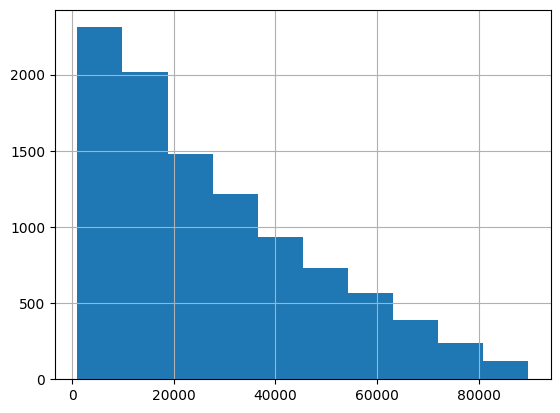

In [21]:
customer_data_df['CustomerLifetimeValue'].hist()

array([[<Axes: title={'center': '0'}>]], dtype=object)

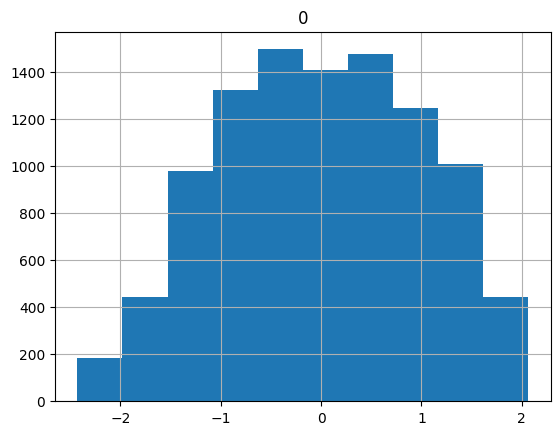

In [22]:
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer()
customer_clv=customer_data_df[['CustomerLifetimeValue']].values
customer_clv_transform= pt.fit_transform(customer_clv)
pd.DataFrame(customer_clv_transform).hist()

In [23]:
customer_data_df['CustomerLifetimeValue']=customer_clv_transform
customer_data_df.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,CustomerLifetimeValue,CustomerEngagementScore
0,17270,594,31,3,3414,1,1,0,93705,0,-0.835803,0.5
1,10860,796,35,3,6656,2,1,1,61819,0,-0.133429,1.5
2,15390,580,56,3,9962,3,1,0,75376,0,0.363594,1.5
3,15191,674,35,2,6147,1,0,0,60504,0,-0.657338,0.5
4,15734,721,36,6,5444,1,1,1,72288,0,0.481401,1.0


# Displaying the Correlation Between Features for the Customer Data to see the inter-relation between different features

In [24]:
corr = customer_data_df.corr()

fig = px.imshow(corr,width=1000, height=1000)
fig.show()

# Dropping the CustomerID row as it is not useful for the AI Models


In [25]:
customer_data_df = customer_data_df.drop('CustomerId', axis=1)
customer_data_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,CustomerLifetimeValue,CustomerEngagementScore
0,594,31,3,3414,1,1,0,93705,0,-0.835803,0.5
1,796,35,3,6656,2,1,1,61819,0,-0.133429,1.5
2,580,56,3,9962,3,1,0,75376,0,0.363594,1.5
3,674,35,2,6147,1,0,0,60504,0,-0.657338,0.5
4,721,36,6,5444,1,1,1,72288,0,0.481401,1.0


<h1 style="color:Tomato; text-align:center;">Step 5 -Model Selection and Training
</h1>

# Training Popular Models

In [26]:
# Importing Popular Machine learning algorithm 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Importing metrics for performance evaluation
from sklearn.metrics import classification_report

In [27]:
# Making the Features and Target Variable
# Spliting data into Train and Test sets
from sklearn.model_selection import train_test_split

customer_features=['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary','CustomerLifetimeValue', 'CustomerEngagementScore']
X = customer_data_df[customer_features]
y = customer_data_df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Defining a function that takes the Algorithm Name as Input and returns the Prediction Accuracy Report

In [28]:
#Defining the ML modeling function
def ml_model(alg, alg_name, r_state=True):
    if r_state:
        model = alg(random_state=1)
    else:
        model = alg() 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(alg_name + " Prediction Report")
    
    #Performance evaluation
    print(classification_report(y_test, y_pred, target_names=['No', 'Yes'], zero_division=0))   
    return model


In [29]:
# Logistic Regression Model
log_model = ml_model(LogisticRegression, 'Logistic Regression', True)

Logistic Regression Prediction Report
              precision    recall  f1-score   support

          No       0.90      1.00      0.95      2701
         Yes       0.00      0.00      0.00       299

    accuracy                           0.90      3000
   macro avg       0.45      0.50      0.47      3000
weighted avg       0.81      0.90      0.85      3000



In [30]:
# SVC Classification Model
svc_model = ml_model(SVC, 'SVC Classification', True)

SVC Classification Prediction Report
              precision    recall  f1-score   support

          No       0.90      1.00      0.95      2701
         Yes       0.00      0.00      0.00       299

    accuracy                           0.90      3000
   macro avg       0.45      0.50      0.47      3000
weighted avg       0.81      0.90      0.85      3000



In [31]:
# Random Forest Classification Model
lr_model = ml_model(RandomForestClassifier, "Random Forest Classification", True)

Random Forest Classification Prediction Report
              precision    recall  f1-score   support

          No       0.90      1.00      0.95      2701
         Yes       0.00      0.00      0.00       299

    accuracy                           0.90      3000
   macro avg       0.45      0.50      0.47      3000
weighted avg       0.81      0.90      0.85      3000



In [32]:
# Random Forest Classification Model
rf_model = ml_model(RandomForestClassifier, "Random Forest Classification", True)

Random Forest Classification Prediction Report
              precision    recall  f1-score   support

          No       0.90      1.00      0.95      2701
         Yes       0.00      0.00      0.00       299

    accuracy                           0.90      3000
   macro avg       0.45      0.50      0.47      3000
weighted avg       0.81      0.90      0.85      3000



In [33]:
# Decision Tree Classification Model
dtc_model = ml_model(DecisionTreeClassifier, "Decision Tree Classification")

Decision Tree Classification Prediction Report
              precision    recall  f1-score   support

          No       0.90      0.88      0.89      2701
         Yes       0.09      0.10      0.09       299

    accuracy                           0.81      3000
   macro avg       0.49      0.49      0.49      3000
weighted avg       0.82      0.81      0.81      3000



In [34]:
# Naive Bayes Classification Model
nbc_model = ml_model(GaussianNB, "Naive Bayes Classification", False)

Naive Bayes Classification Prediction Report
              precision    recall  f1-score   support

          No       0.90      1.00      0.95      2701
         Yes       0.00      0.00      0.00       299

    accuracy                           0.90      3000
   macro avg       0.45      0.50      0.47      3000
weighted avg       0.81      0.90      0.85      3000



In [35]:
# K Nearest Neighbors Model
knn_model = ml_model(KNeighborsClassifier, "K Nearest Neighbors", False)

K Nearest Neighbors Prediction Report
              precision    recall  f1-score   support

          No       0.90      0.99      0.94      2701
         Yes       0.07      0.01      0.01       299

    accuracy                           0.89      3000
   macro avg       0.49      0.50      0.48      3000
weighted avg       0.82      0.89      0.85      3000



<h1 style="color:Tomato; text-align:center;">Step 6 - Model Evaluation
</h1>

# From all the Selected Models- Decision Tree Classifier has the best overall Accuracy, Precision and Recall
# Hence For the Given Customer DataSet the Decision Tree Classifier will predict the most correct result


<h1 style="color:Tomato; text-align:center;">Step 7 - Model Deployment
</h1>

In [36]:
# Defining a function that takes input of the Customer Data and Predicts whether the Customer will Churn or not.

def churn_pred(cust_data):
    model = DecisionTreeClassifier(random_state=1)
    model.fit(X, y)
    y_pred = model.predict(cust_df)
    if y_pred:
        print("Yes this Customer will churn in future")
    else:
        print("No this Customer will not churn")

In [37]:
# Defining the Customer Data 
# we can change the values to see whether the Customer will churn or not
# This single Customer DataFrame will be provided as an input in the churn_pred funtion defined above

cust = {}
cust['CreditScore'] = 460
cust['Age'] = 30
cust['Tenure'] = 6
cust['Balance'] = 150000
cust['NumOfProducts'] = 1
cust['HasCrCard'] = 1
cust['IsActiveMember'] = 1
cust['EstimatedSalary'] = 10000
cust['CustomerLifetimeValue'] = cust['Tenure'] * cust['Balance']
cust['CustomerEngagementScore'] = (cust['NumOfProducts'] + cust['IsActiveMember']) / 2

cust_df=pd.DataFrame(cust, index=[0])

In [38]:
# Data Transformation for CustomerLifetimeValue Field

pt = PowerTransformer()
clv_old=cust_df[['CustomerLifetimeValue']].values
train_clv= pt.fit_transform(customer_clv)
clv_new=pt.transform(clv_old)
cust_df['CustomerLifetimeValue']=clv_new
print(clv_old,clv_new)

[[900000]] [[8.07613671]]


In [39]:
cust_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CustomerLifetimeValue,CustomerEngagementScore
0,460,30,6,150000,1,1,1,10000,8.076137,1.0


In [40]:
# Running the Churn_pred function for the given customer record  
churn_pred(cust_df)

Yes this Customer will churn in future
